# HW 09. Linear Regression

We continue to work with the same [SOCR](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights) data source as the last time.

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

Import the data to a dataframe:

In [2]:
data = pd.read_csv('teenagers.csv', index_col='Index')

data.head()

,Height,Weight,BMI
Index,,,
0,65.78331,112.9925,18.357573
1,71.51521,136.4873,18.762577
2,69.39874,153.0269,22.338895
3,68.21660,142.3354,21.504526
4,67.78781,144.2971,22.077581


**Task 1:** Use the method plot() from the module matplotlib.pyplot to plot the dependence of the weight on the height from the dataset. Add the plots of the two linear regressions to the graph: one with the coefficients ($w_0, w_1) = (60, 0.05)$ and the other with ($w_0, w_1) = (50, 0.16)$. Do the regressions approximate the data well? Don't forget to label the axis and add a title to the figure.

[Text(0, 0.5, 'Weight'),
 Text(0.5, 0, 'Height'),
 Text(0.5, 1.0, 'Weight vs. Height')]

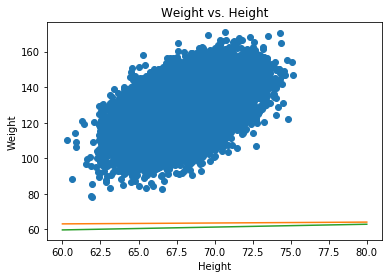

In [12]:
# Tried height as x and weight as y but the regressions don't match the data at all
ax = plt.axes()
ax.plot(data['Height'], data['Weight'], 'o')
xx = np.linspace(60, 80, 100)
w0_1, w1_1 = 60, 0.05
w0_2, w1_2 = 50, 0.16
ax.plot(xx, w1_1 * xx + w0_1)
ax.plot(xx, w1_2 * xx + w0_2)
ax.set(xlabel = 'Height', ylabel = 'Weight', title = "Weight vs. Height")

[Text(0, 0.5, 'Height'), Text(0.5, 0, 'Weight')]

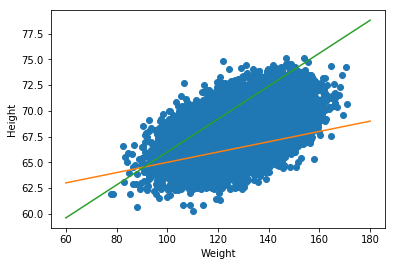

In [11]:
# Weight as x and height as y seems to be right
ax = plt.axes()
ax.plot(data['Weight'], data['Height'], 'o')
xx = np.linspace(60, 180, 100)
w0_1, w1_1 = 60, 0.05
w0_2, w1_2 = 50, 0.16
ax.plot(xx, w1_1 * xx + w0_1)
ax.plot(xx, w1_2 * xx + w0_2)
ax.set(xlabel = 'Weight', ylabel = 'Height', title = "Weight vs. Height")

The regressions approximate pretty well. Somewhere in between the two would be best. I would probably chose the regression in green over the orange one.

**Task 2:** Write a python fucntion error(X, Y, w0, w1), which calculates the Loss Function $Q(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $

In [13]:
def error(X, Y, w0, w1):
    q = 0
    #for i in range(1, len(X)):
    #    q += Y[i] - (w0 + w1 * X[i])**2
    error_array = (Y - (w0 + w1 * X))**2
    q = sum(error_array)
    return q

**Task 3:** Plot the loss function vs $w_1$ with a fixed value of $w_0 = 50$ for your dataset. Where approximately does the function reaches its minimum?

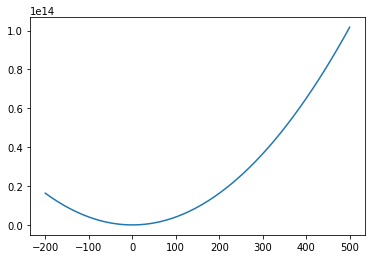

In [18]:
fig2 = plt.figure()
ax2 = plt.axes()
errors_len = 200
www1 = np.linspace(-200, 500, errors_len)
www0 = np.zeros(errors_len) + 50
errors_arr = np.zeros(errors_len)
for i in range(0, errors_len):
    errors_arr[i] = error(data['Weight'], data['Height'], www0[i], www1[i])
ax2.plot(www1, errors_arr)


**Task 4:** Use the method *minimize_scalar* from the module *scipy.optimize* to find the minimum of your Loss function for a fixed value of $w_0 = 50$. Make the method to look for the minimum in the range $ -5 \le w_1 \le 5$.

In [17]:
def error_fun_50(w1):
    return error(data['Weight'], data['Height'], 50, w1)

w1_opt = minimize_scalar(error_fun_50, bounds = (-5, 5))
w1_opt.x

0.14109203728834385

**Task 5:** Use the method plot() from the module matplotlib.pyplot to plot the dependence of the weight on the height from the dataset. Add to the graph a plot of the linear regression with $w_0 = 50$, and $w_0 = \text{the value you found in Task 4}$. Does this linear regression model the data better than the one from the Task 1?

[Text(0, 0.5, 'Height'),
 Text(0.5, 0, 'Weight'),
 Text(0.5, 1.0, 'Weight vs Height')]

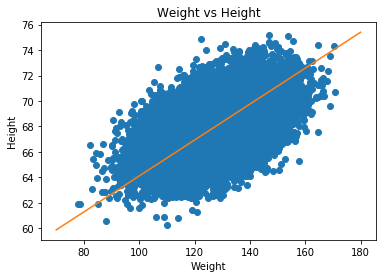

In [24]:
fig3 = plt.figure()
ax3 = plt.axes()
plt.plot(data['Weight'], data['Height'], 'o')
xx = np.linspace(70, 180, 200)
w0_1, w1_1 = 50, w1_opt.x
plt.plot(xx, w1_1 * xx + w0_1)
ax3.set(xlabel = 'Weight', ylabel = 'Height', title = 'Weight vs Height')

This linear regression model is definitely a better fit than the one from Task 1.

**Task 6:** Make a 3D plot of the Loss function vs both $w_0$ and $w_1$. Label the axis and add a title to the plot. According to the plot, where should we look for the miminum of the loss function?

In [31]:
fig4 = plt.figure()
ax = fig.gca(projection='3d')

X = np.linspace(-10000, 10000, 40)
Y = np.linspace(0, 200, 40)

Z = np.zeros((len(np.linspace(-10000, 10000, 40)), len(np.linspace(0, 200, 40))))

def error_2d(w0, X):
    return error(data['Weight'], data['Height'], w0, w1)

for i in range(0, len(X)):
    for j in range(0, len(Y)):
        Z[i,j] = error_2D(X[i], Y[j])
        
X, Y = np.meshgrid(X,Y)

surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Z')
plt.show()

C:\Users\bayli\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  
C:\Users\bayli\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


NameError: name 'error_2D' is not defined

<Figure size 432x288 with 0 Axes>

**Task 7:** Use the method *minimize* from the module *scipy.optimize* to find the minimum of the loss function. Make the method to look for the minimum inside the range $-100 \le w_0 \le 100$, $-5 \le w_1 \le 5$. Use the argument *method='L-BFGS-B'*

In [32]:
def error_2D(w):
    return error(data['Weight'], data['Height'], w[0], w[1])

res = minimize(error_2D, (0,0), method='L-BFGS-B')
res.x

array([57.57177252,  0.08200651])

**Task 8:** Use the method plot() from the module matplotlib.pyplot to plot the dependence of the weight on the height from the dataset. Add to the graph a plot of the linear regression with $w_0 = w_0 = \text{the value you found in Task 7}$, and $w_0 = \text{the value you found in Task 7}$.

[Text(17.200000000000003, 0.5, 'Height'),
 Text(0.5, 17.200000000000003, 'Weight'),
 Text(0.5, 1.0, 'Weight vs Height')]

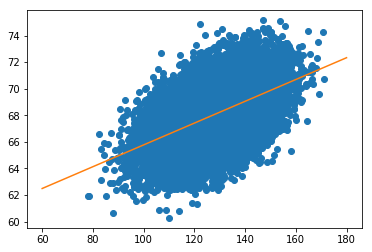

In [36]:
fig5 = plt.figure()
ax5 = plt.axes()
ax5.plot(data['Weight'], data['Height'], 'o')
xx = np.linspace(60, 180, 200)
w0_1, w1_1 = res.x[0], res.x[1]
ax5.plot(xx, w1_1 * xx + w0_1)
ax3.set(xlabel = 'Weight', ylabel = 'Height', title = 'Weight vs Height')